In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.error_functions import smapetf
from src.visualization import *
from src.evaluation import evaluate_model
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


In [26]:
EPOCHS = 100
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 100
LOSS = 'mae'

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()

#hist = model.evaluate(validation_data_generator)
#print(hist)
#model.save('../models')

In [27]:
training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE)

data_model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        horizon=HORIZON, learning_rate=0.001, loss = LOSS, dropout_ratio = 0.3)

data_model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

Epoch 1/100
129/129 [==============================] - 20s 158ms/step - loss: 0.1339 - val_loss: 0.4940
Epoch 2/100
129/129 [==============================] - 21s 162ms/step - loss: 0.0966 - val_loss: 0.4943
Epoch 3/100
129/129 [==============================] - 20s 155ms/step - loss: 0.0818 - val_loss: 0.4757
Epoch 4/100
129/129 [==============================] - 19s 147ms/step - loss: 0.0711 - val_loss: 0.5115
Epoch 5/100
129/129 [==============================] - 18s 141ms/step - loss: 0.0644 - val_loss: 0.4577
Epoch 6/100
129/129 [==============================] - 18s 141ms/step - loss: 0.0596 - val_loss: 0.3832
Epoch 7/100
129/129 [==============================] - 18s 140ms/step - loss: 0.0567 - val_loss: 0.4326
Epoch 8/100
129/129 [==============================] - 18s 140ms/step - loss: 0.0543 - val_loss: 0.4158
Epoch 9/100
129/129 [==============================] - 18s 142ms/step - loss: 0.0552 - val_loss: 0.4403
Epoch 10/100
129/129 [==============================] - 18s 142m

129/129 [==============================] - 18s 140ms/step - loss: 0.0404 - val_loss: 0.3750
Epoch 80/100
129/129 [==============================] - 18s 140ms/step - loss: 0.0414 - val_loss: 0.4167
Epoch 81/100
129/129 [==============================] - 18s 141ms/step - loss: 0.0401 - val_loss: 0.3575
Epoch 82/100
129/129 [==============================] - 18s 140ms/step - loss: 0.0402 - val_loss: 0.3786
Epoch 83/100
129/129 [==============================] - 18s 140ms/step - loss: 0.0401 - val_loss: 0.4000
Epoch 84/100
129/129 [==============================] - 18s 140ms/step - loss: 0.0400 - val_loss: 0.3884
Epoch 85/100
129/129 [==============================] - 18s 140ms/step - loss: 0.0403 - val_loss: 0.4054
Epoch 86/100
129/129 [==============================] - 18s 137ms/step - loss: 0.0399 - val_loss: 0.4230
Epoch 87/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0396 - val_loss: 0.3882
Epoch 88/100
129/129 [==============================] - 18s 136ms/st

In [28]:
training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE, dim = 1)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE, dim = 1)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE, dim = 1)

diff_model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        horizon=HORIZON, learning_rate=0.001, loss = LOSS, dropout_ratio = 0.3)

diff_model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

Epoch 1/100
129/129 [==============================] - 18s 142ms/step - loss: 0.0259 - val_loss: 0.0343
Epoch 2/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0230 - val_loss: 0.0314
Epoch 3/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0223 - val_loss: 0.0377
Epoch 4/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0219 - val_loss: 0.0321
Epoch 5/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0216 - val_loss: 0.0367
Epoch 6/100
129/129 [==============================] - 17s 136ms/step - loss: 0.0214 - val_loss: 0.0541
Epoch 7/100
129/129 [==============================] - 18s 137ms/step - loss: 0.0212 - val_loss: 0.0661
Epoch 8/100
129/129 [==============================] - 18s 137ms/step - loss: 0.0210 - val_loss: 0.0409
Epoch 9/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0208 - val_loss: 0.0621
Epoch 10/100
129/129 [==============================] - 18s 137m

129/129 [==============================] - 18s 136ms/step - loss: 0.0183 - val_loss: 0.0759
Epoch 80/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0181 - val_loss: 0.0675
Epoch 81/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0181 - val_loss: 0.0708
Epoch 82/100
129/129 [==============================] - 18s 137ms/step - loss: 0.0181 - val_loss: 0.0723
Epoch 83/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0181 - val_loss: 0.0731
Epoch 84/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0181 - val_loss: 0.0642
Epoch 85/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0181 - val_loss: 0.0700
Epoch 86/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0181 - val_loss: 0.0650
Epoch 87/100
129/129 [==============================] - 18s 136ms/step - loss: 0.0180 - val_loss: 0.0745
Epoch 88/100
129/129 [==============================] - 18s 138ms/st

In [4]:
print(train_x[0,0,0])
print(train_x[0,1,0])
print(train_x[0,0,1])
-0.160977634

-0.16118157503547753
-0.161079604461534
0.00010197057394353837


In [53]:

#=================== Evaluate Model
#model = M4Model(batch_size=BATCH_SIZE)
#model.load('../models/10/architecture.json','../models/10/weights.h5')

#model.compile()
#hist = model.train(gen, epochs=EPOCHS)

#gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  #48, 48, 100)

#train_x, train_y, test_x, test_y = gen.get_data()

train_error = evaluate_model(data_model, train_x[:,:,0], train_y[:,:,0], smapetf)
print(train_error)

test_error = evaluate_model(data_model, test_x[:,:,0], test_y[:,:,0], smapetf)
print(test_error)


10.559492806181646
57.66516025749401


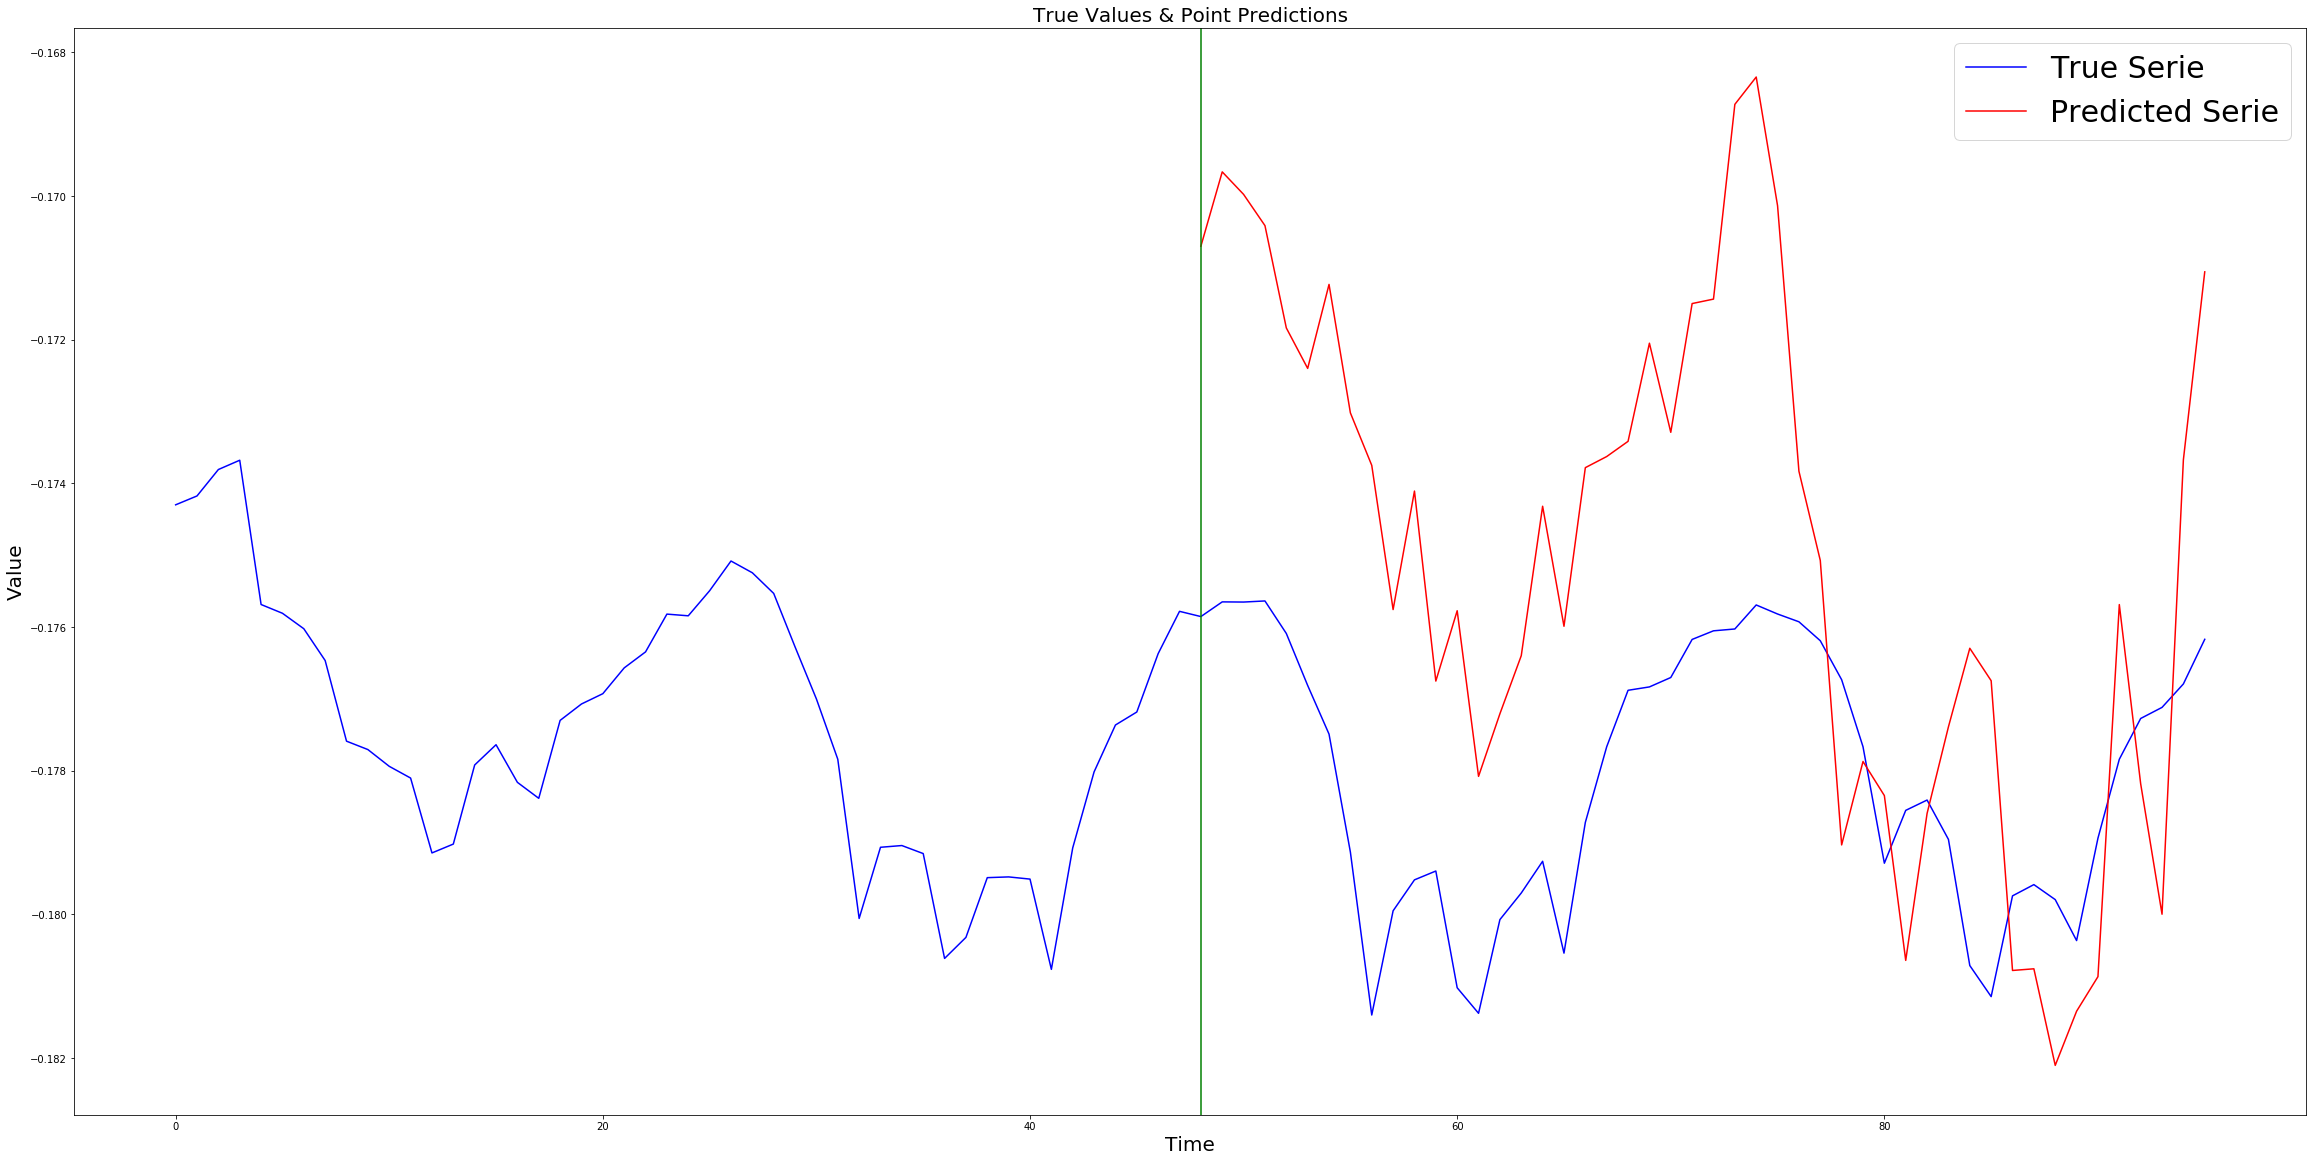

In [49]:
IDX = 9
model = data_model
dim = 0
#============ Predict Train
predictedY = model.predict(train_x[:BATCH_SIZE,:,dim].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(train_x, train_y, predictedY, series_num=10)
#plot_serie_and_prediction(train_x[:,:,dim], train_y[:,:, dim], predictedY, serie_indx=IDX)

#============ Predict Test
predictedY = model.predict(validate_x[:BATCH_SIZE,:,dim].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(validate_x[:,:,dim], validate_y[:,:,dim], predictedY, serie_indx=IDX)

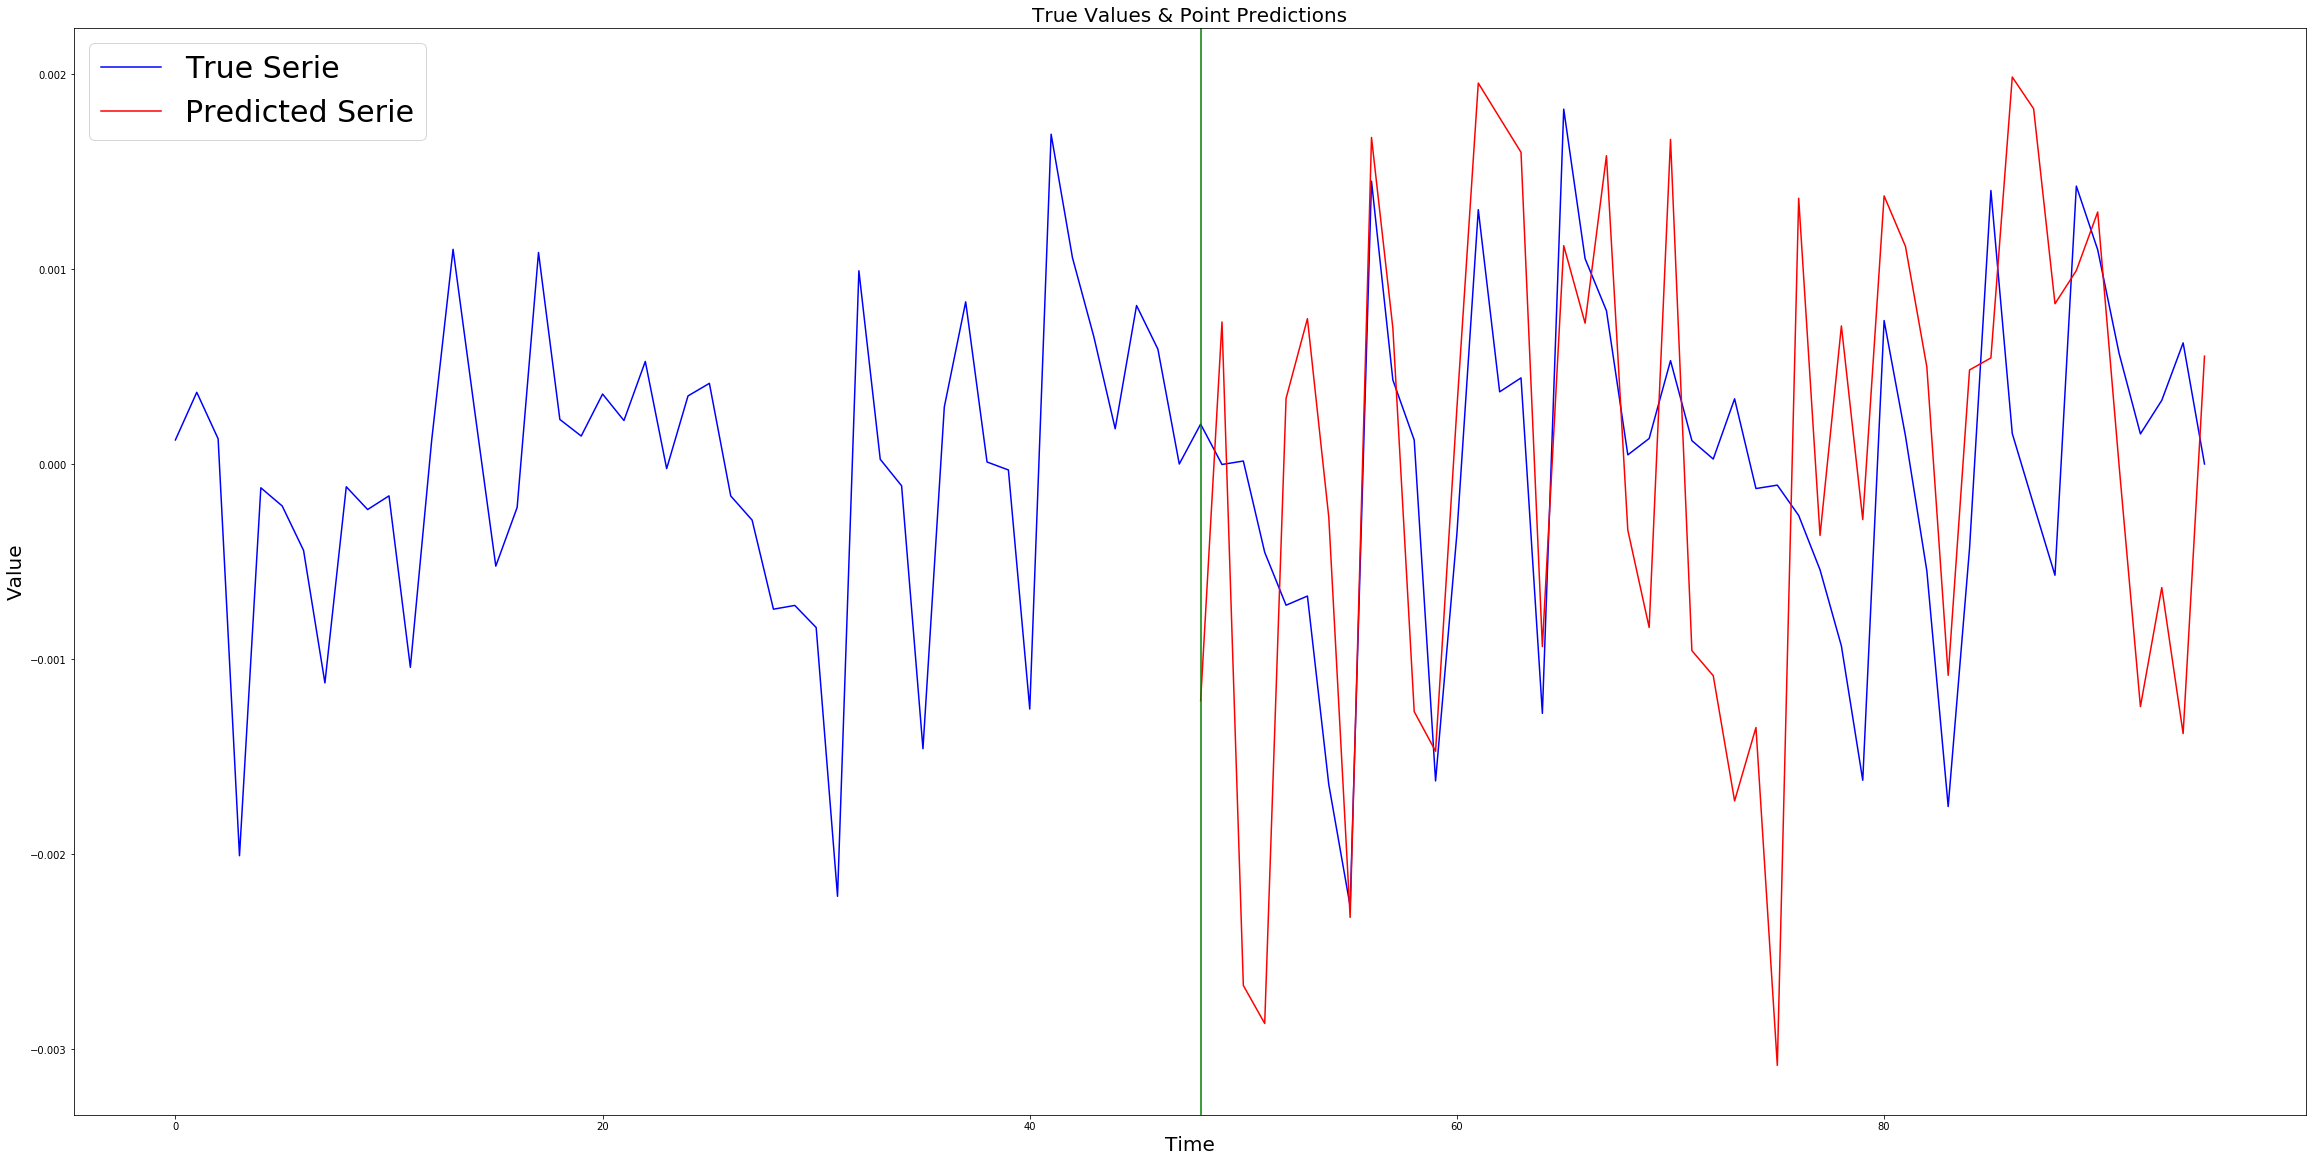

In [50]:
IDX = 9
model = diff_model
dim = 1
#============ Predict Train
predictedY = model.predict(train_x[:BATCH_SIZE,:,dim].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(train_x, train_y, predictedY, series_num=10)
#plot_serie_and_prediction(train_x[:,:,dim], train_y[:,:, dim], predictedY, serie_indx=IDX)

#============ Predict Test
predictedY = model.predict(validate_x[:BATCH_SIZE,:,dim].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(validate_x[:,:,dim], validate_y[:,:,dim], predictedY, serie_indx=IDX)

In [56]:
from src.evaluation import reshape_data_in_batches

def evaluate_combined_model(data_model, diff_model, X, Y, error_function):
    
    X_data,Y_data = reshape_data_in_batches(X[:,:,0], Y[:,:,0], model.batch_size)
    X_diff,Y_diff = reshape_data_in_batches(X[:,:,1], Y[:,:,1], model.batch_size)
    
    errors = []
    
    for x_data_batch, y_data_batch, x_diff_batch, y_diff_batch in zip(X_data, Y_data, X_diff, Y_diff):
        predictedData = data_model.predict(x_data_batch)
        predictedDiff = diff_model.predict(x_diff_batch)
        combinedPred = predictedData + predictedDiff
        combinedPred = combinedPred[:,:-1]
        combinedPred = np.hstack((predictedData[:,0][:,np.newaxis], combinedPred))
        final_pred = (predictedData + combinedPred)/2

        errors.append(error_function(y_data_batch[:,:,0], final_pred))
        
    return np.mean(errors)

train_error = evaluate_combined_model(data_model, diff_model, train_x, train_y, smapetf)
print(train_error)

test_error = evaluate_combined_model(data_model, diff_model, test_x, test_y, smapetf)
print(test_error)


10.468640445353083
57.528473728575875


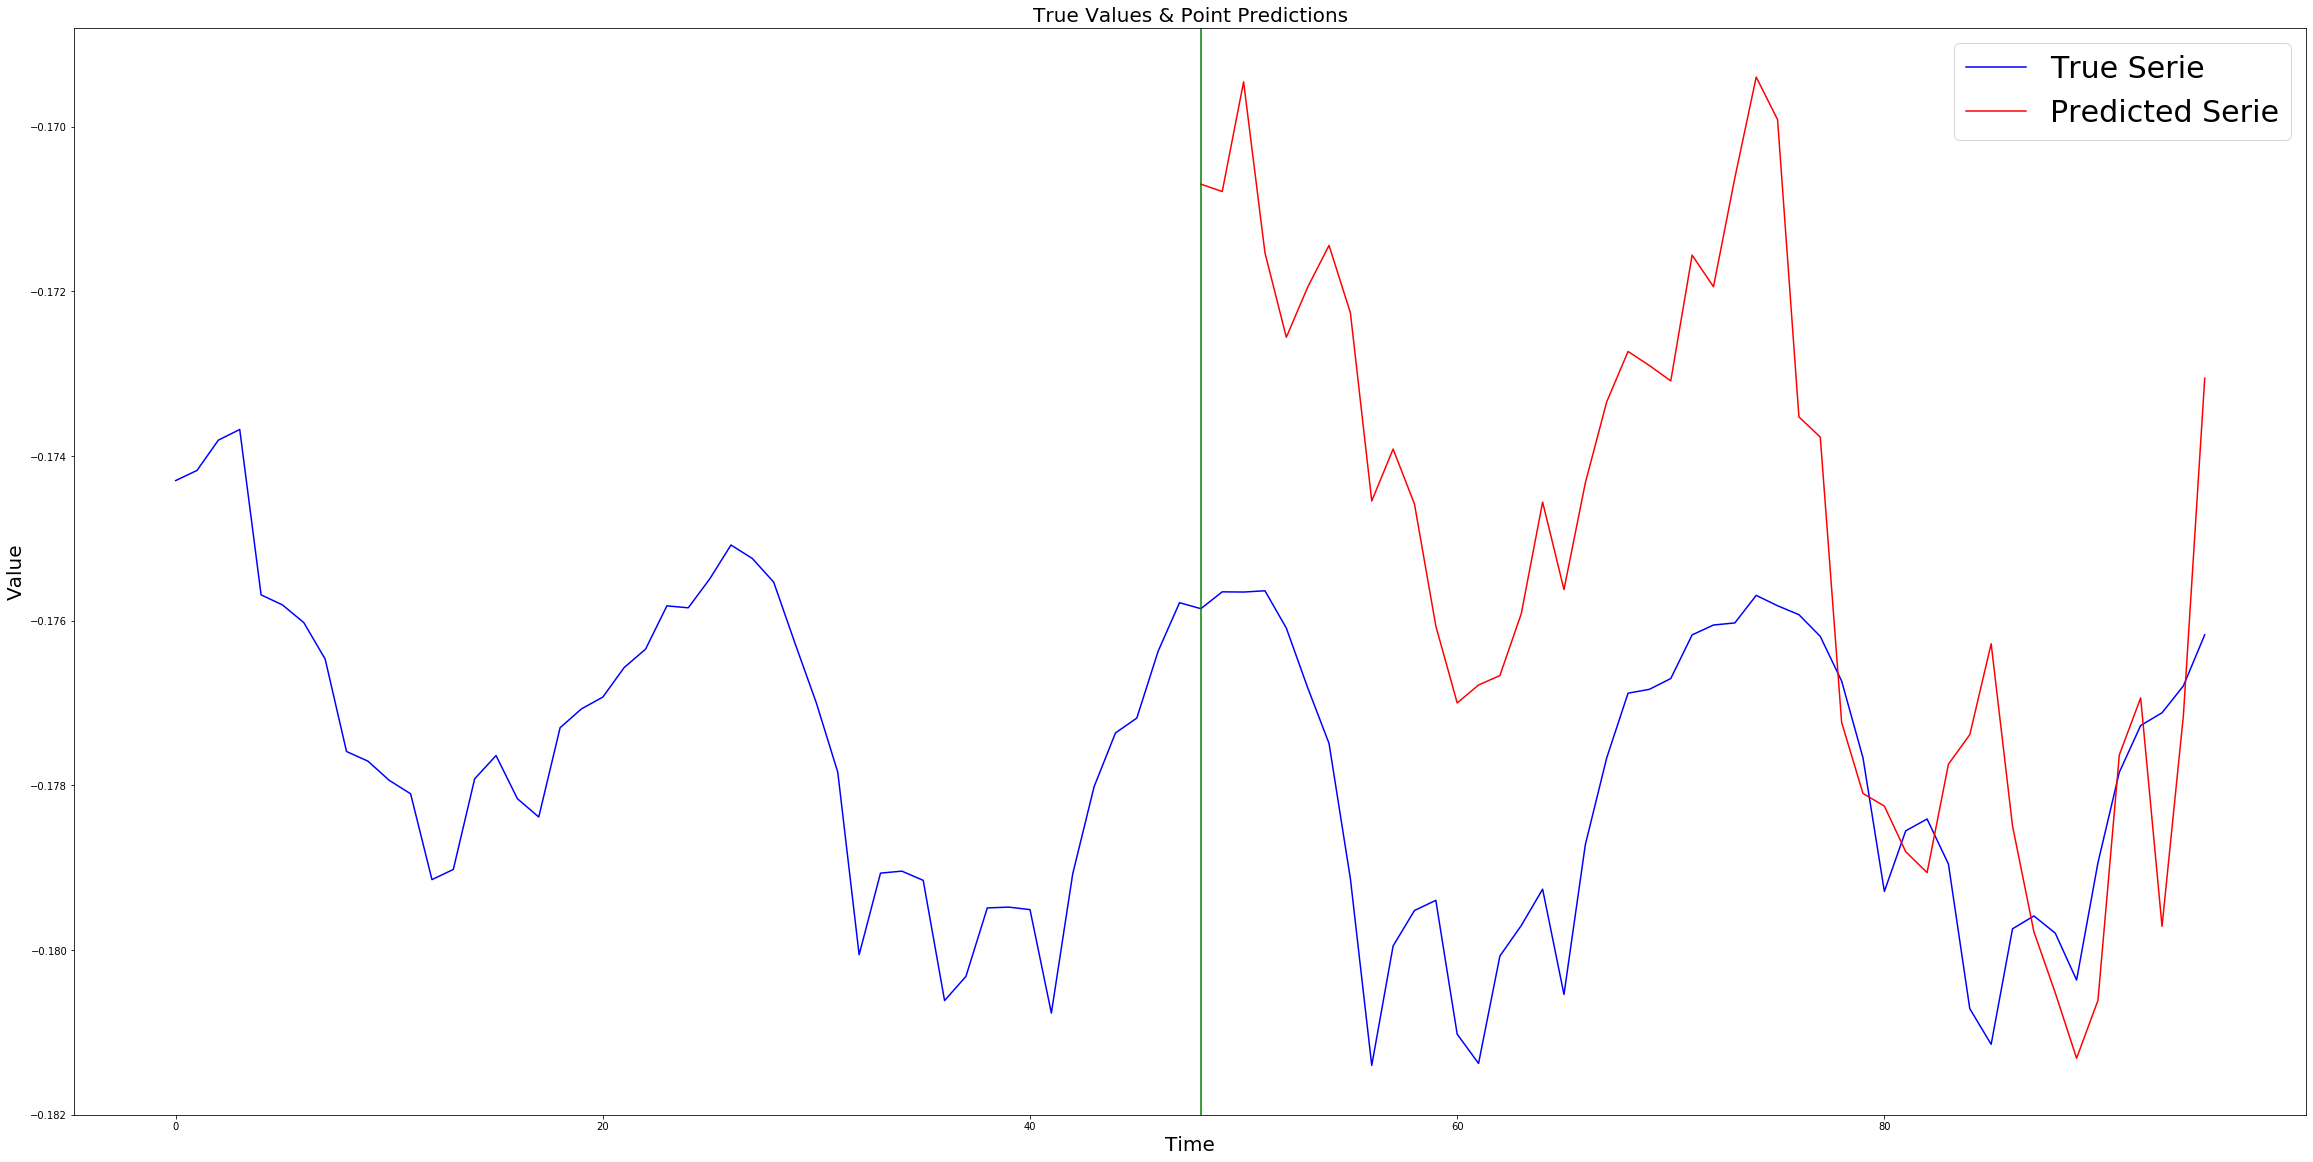

In [51]:
IDX = 9
predictedData = data_model.predict(validate_x[:BATCH_SIZE,:,0].reshape(BATCH_SIZE, LOOKBACK, 1))
predictedDiff = diff_model.predict(validate_x[:BATCH_SIZE,:,1].reshape(BATCH_SIZE, LOOKBACK, 1))

combinedPred = predictedData + predictedDiff

combinedPred = combinedPred[:,:-1]
combinedPred = np.hstack((predictedData[:,0][:,np.newaxis], combinedPred))

final_pred = (predictedData + combinedPred)/2

plot_serie_and_prediction(validate_x[:,:,0], validate_y[:,:,0], final_pred, serie_indx=IDX)

In [31]:
from utils import exponential_smoothing

gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  640, HORIZON, BATCH_SIZE)
train_x, train_y, test_x, test_y = gen.get_data()

yPred =  np.empty(shape=[0, HORIZON])
for data in test_x:
    pred = exponential_smoothing(data)
    yPred = np.vstack((yPred, pred))

print(yPred.shape)

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3

(414, 48)


tf.Tensor(86.17036794357033, shape=(), dtype=float64)


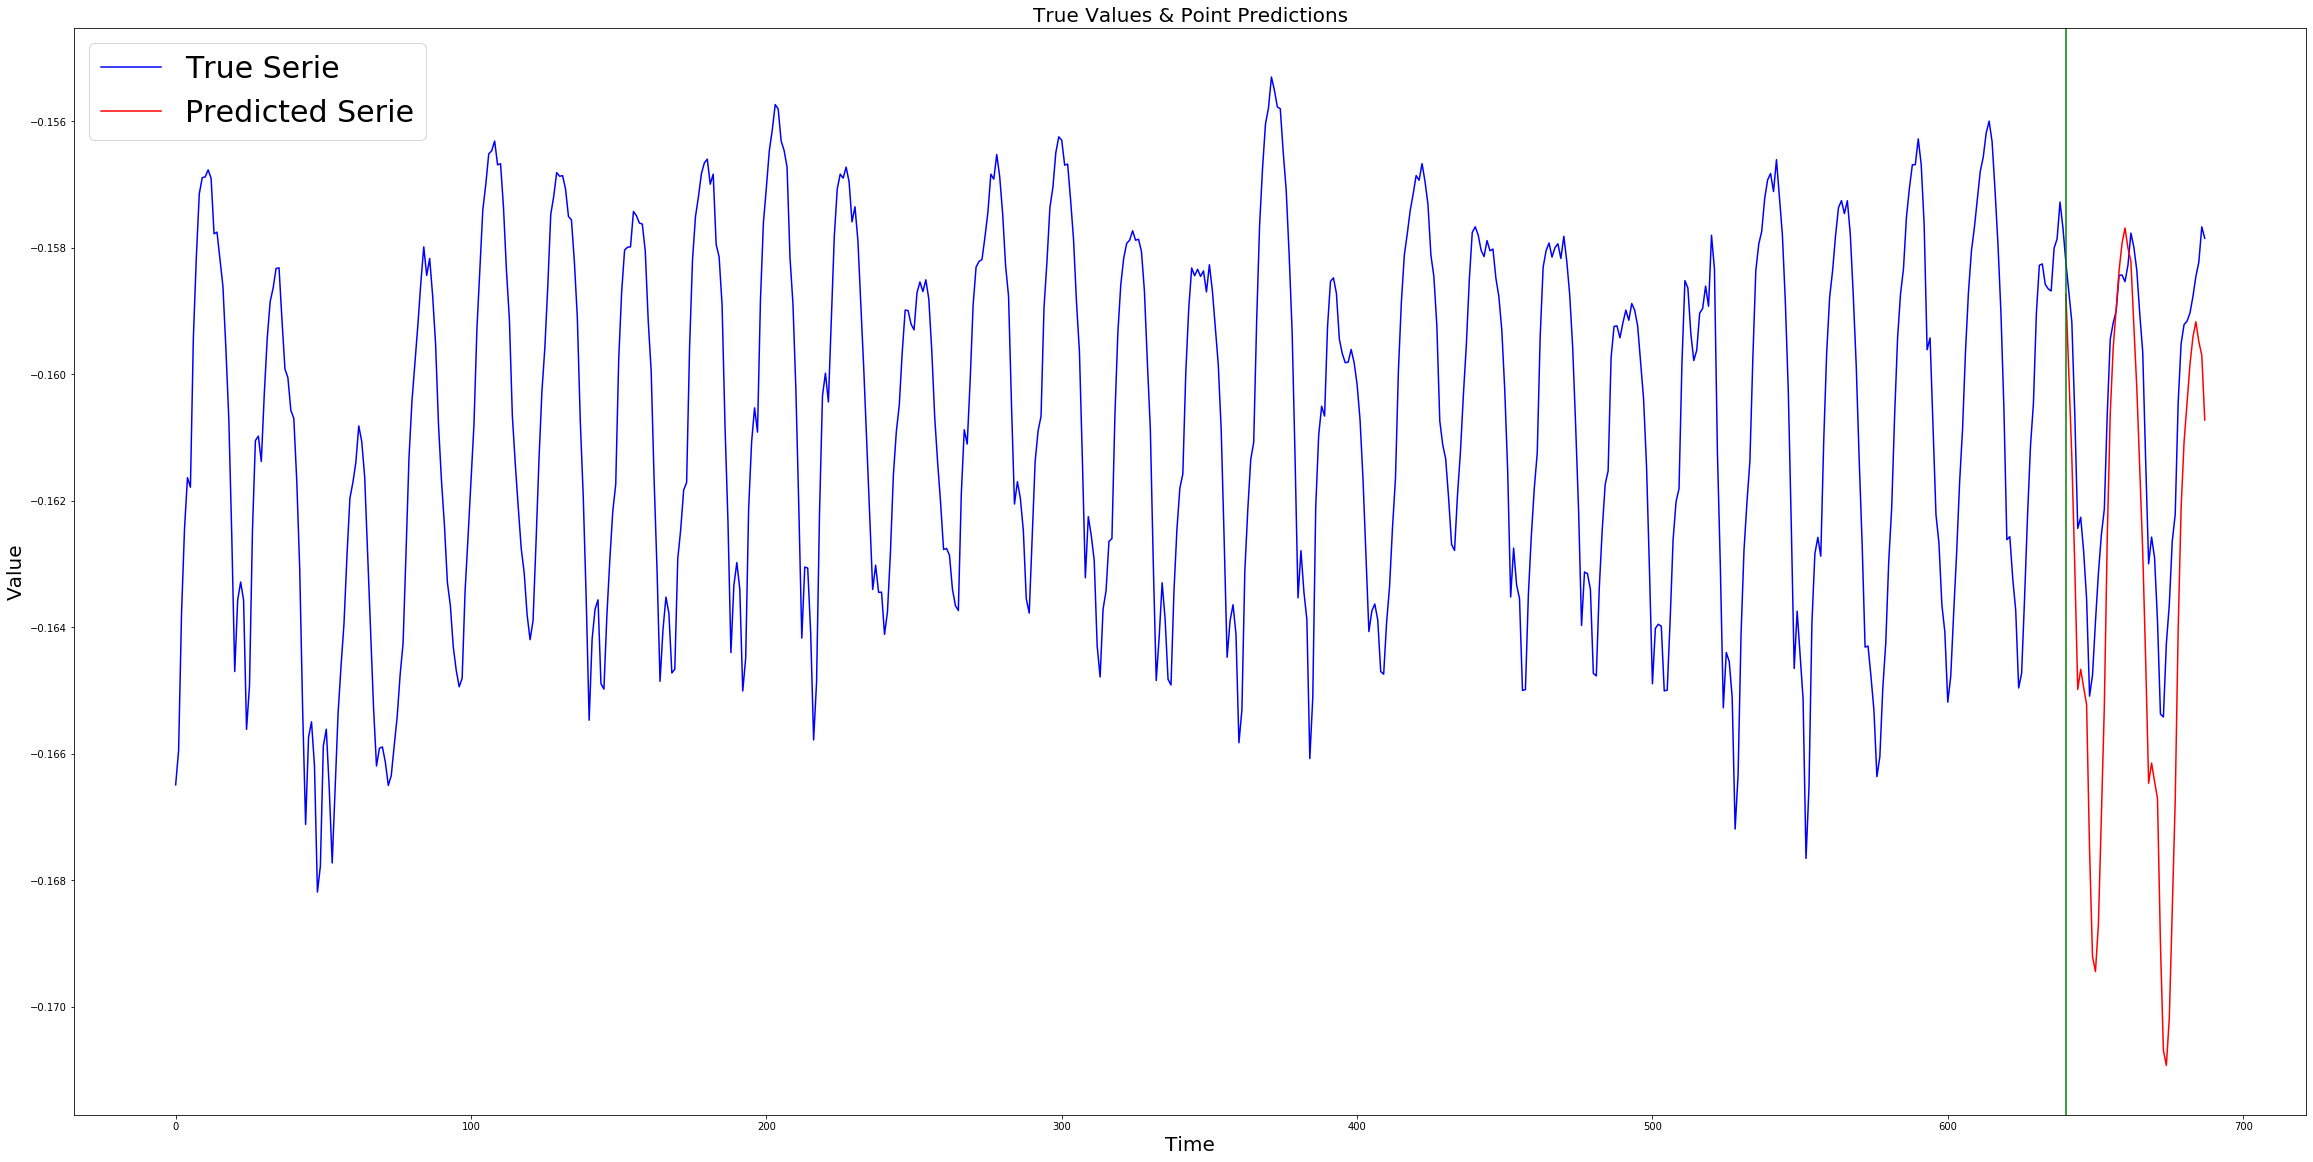

In [33]:
IDX = 0
print( smapetf(test_y, yPred))
plot_serie_and_prediction(test_x, test_y, yPred, serie_indx=IDX)